In [1]:
import oracle

In [29]:
import numpy as np

class SGD:
    def __init__(self, oracle: object, N: int, C: float):
        self.oracle = oracle
        self.N = N
        self.C = C
        self.p = oracle.initialize_prices()
        self.S = oracle.s
        self.D = oracle.d

    def update(self):
        results = []
        p_mean = self.p
        for t in range(self.N):
            index = np.random.randint(0, self.S + self.D)
            self.p = (self.p - (self.C / np.sqrt(t + 1)) * self.oracle.compute_gradient(
                index
            )).clip(min=0)
            self.oracle.prices = self.p
            print("prices: ", self.p)
            print("cost function: ", self.oracle.compute_cost_func(self.oracle.prices))
            results.append(self.oracle.compute_cost_func(self.oracle.prices))
            print("gradient: ", self.oracle.compute_gradient(index))
            p_mean += self.p
        return results

    def get_prices(self):
        return self.p
    

class AdaGrad:
    """Adaptive Gradient."""

    def __init__(self, oracle: object, N: int, C: float):
        """
        Args:
            oracle (object): Oracle object.
            N (int): Number of iterations.
            C (float): Learning rate.
        """
        self.oracle = oracle
        self.N = N
        self.C = C
        self.p = oracle.initialize_prices()
        self.S = oracle.s
        self.D = oracle.d

   
    def update(self):
        """
        Updates prices of products using AdaGrad.
        Returns:
            p_mean (float): Mean of prices.
        """
        p_mean = self.p
        H = np.zeros(self.oracle.n)
        results = []
        for _ in range(self.N):
            index = np.random.randint(0, self.S + self.D)
            g = self.oracle.compute_gradient(index)
            H += g**2
            self.p = (self.p - self.C / np.sqrt(H + 1e-7) * g).clip(min=0)
            self.oracle.prices = self.p
            print("prices: ", self.p)
            print("cost function: ", self.oracle.compute_cost_func(self.oracle.prices))
            results.append(self.oracle.compute_cost_func(self.oracle.prices))
            print("gradient: ", self.oracle.compute_gradient(index))
            p_mean += self.p
        return results
    

class ADAM:
    """Adaptive Moment Estimation."""

    def __init__(
        self, oracle: object, N: int, C: float, beta1: float = 0.9, beta2: float = 0.999
    ):
        """
        Parameters:
        beta1 (float): Decay rate of the first moment.
        beta2 (float): Decay rate of the second moment.
        """
        self.oracle = oracle
        self.N = N
        self.C = C
        self.p = oracle.initialize_prices()
        self.S = oracle.s
        self.D = oracle.d
        self.beta1 = beta1
        self.beta2 = beta2

    def update(self):
        """
        Updates prices of products using ADAM.
        Returns:
            p_mean (float): Mean of prices.
        """
        results = []
        p_mean = self.p
        m = np.zeros(self.oracle.n)
        v = np.zeros(self.oracle.n)
        for t in range(self.N):
            index = np.random.randint(0, self.S + self.D)
            g = self.oracle.compute_gradient(index)
            m = self.beta1 * m + (1 - self.beta1) * g
            v = self.beta2 * v + (1 - self.beta2) * g**2
            m_hat = m / (1 - self.beta1 ** (t + 1))
            v_hat = v / (1 - self.beta2 ** (t + 1))
            self.p = (self.p - self.C / np.sqrt(v_hat + 1e-7) * m_hat).clip(min=0)
            self.oracle.prices = self.p
            print("prices: ", self.p)
            print("cost function: ", self.oracle.compute_cost_func(self.oracle.prices))
            results.append(self.oracle.compute_cost_func(self.oracle.prices))
            print("gradient: ", self.oracle.compute_gradient(index))
            p_mean += self.p
        return results

In [3]:
from oracle import Oracle

In [35]:
oracle_obj = Oracle(5, 10, 20, 5, 0.0001)

In [5]:
sgd = SGD(oracle_obj, 1000, 0.05)

In [14]:
adagrad = AdaGrad(oracle_obj, 1000, 0.05)

In [34]:
adam = ADAM(oracle_obj, 1000, 0.001)

In [36]:
oracle_obj.compute_y()

array([[0.24720964, 0.07972879, 0.3918461 , 0.37798581, 0.07535961,
        0.09957784, 0.35555641, 0.50012253, 0.39793196, 0.48088155,
        0.34760798, 0.17378869, 0.42499835, 0.14849179, 0.35663353,
        0.18971699, 0.35485753, 0.39272473, 0.11254069, 0.40350252],
       [0.24713527, 0.07980124, 0.39170955, 0.37809063, 0.07534074,
        0.09950714, 0.35544765, 0.50013492, 0.39808629, 0.48086696,
        0.3474705 , 0.17387668, 0.42488349, 0.14853777, 0.35647805,
        0.18965976, 0.35473496, 0.39288973, 0.11262888, 0.40357284],
       [0.24718657, 0.0797594 , 0.39180373, 0.37811869, 0.07530989,
        0.09951219, 0.35539625, 0.50001148, 0.39810988, 0.48087109,
        0.34757219, 0.1737586 , 0.4249422 , 0.14854284, 0.3565283 ,
        0.18967431, 0.35486164, 0.39272258, 0.11249182, 0.40344823],
       [0.24703994, 0.07968172, 0.391871  , 0.37798628, 0.07529383,
        0.09960096, 0.35554801, 0.50000368, 0.39795563, 0.48090113,
        0.34742817, 0.17383511, 0.42493789, 0

In [37]:
oracle_obj.compute_cost_func(oracle_obj.prices)

40.36060803398182

In [8]:
results_sgd = sgd.update()

prices:  [0.31476227 0.53049867 0.77054894 0.16215381 0.465835   0.27780123
 0.72906172 0.36231492 0.061971   0.41909538 0.49329745 0.46343739
 0.83367656 0.62623274 0.86340102 0.97499771 0.46059053 0.30860982
 0.47151324 0.93696369]
cost function:  38.82511325928564
gradient:  [0.15753478 0.26542197 0.38530472 0.08110444 0.23296393 0.13903193
 0.3646909  0.18122281 0.03098666 0.20953998 0.2467278  0.23177712
 0.41685281 0.31324502 0.43173765 0.48754597 0.23036746 0.1544024
 0.2357863  0.46857839]
prices:  [0.31476227 0.53049867 0.77054894 0.16215381 0.465835   0.27780123
 0.72906172 0.36231492 0.061971   0.41909538 0.49329745 0.46343739
 0.83367656 0.62623274 0.86340102 0.97499771 0.46059053 0.30860982
 0.47151324 0.93696369]
cost function:  38.82511325928564
gradient:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
prices:  [0.31476227 0.55936618 0.79941645 0.16215381 0.465835   0.30666875
 0.72906172 0.36231492 0.061971   0.41909538 0.49329745 0.46343739
 0.83367656 0.62623274 0.89226853

In [17]:
results = adagrad.update()

prices:  [0.49566956 1.         0.41081894 0.98375918 0.86679075 0.37000132
 0.98660438 0.15415707 0.62382907 0.59921805 0.55361472 0.42151773
 0.65652876 0.29551825 0.15292955 0.57460167 0.894608   0.39176207
 0.09413318 0.90615294]
cost function:  40.30940501847677
gradient:  [ 0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
prices:  [0.49566956 1.         0.41081894 0.98375918 0.86679075 0.42000132
 0.98660438 0.15415707 0.62382907 0.59921805 0.55361472 0.42151773
 0.65652876 0.29551825 0.20292955 0.57460167 0.894608   0.39176207
 0.09413318 0.90615294]
cost function:  40.31130608093606
gradient:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
prices:  [0.49566956 1.         0.41081894 0.98375918 0.86679075 0.42000132
 0.98660438 0.15415707 0.62382907 0.59921805 0.55361472 0.42151773
 0.65652876 0.29551825 0.20292955 0.57460167 0.894608   0.39176207
 0.09413318 0.90615294]
cost function:  40.31130608093606
gradient:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
prices:  [0.49566

In [38]:
adam_results = adam.update()

prices:  [0.77959507 0.45562757 0.90234099 1.         0.88048688 0.15347466
 0.5925018  0.55722216 0.1097655  0.23387241 0.50299114 0.33085508
 0.47804764 0.31565869 0.38633785 0.92428715 0.03097525 0.95755509
 0.54097909 0.2309768 ]
cost function:  39.55753699483234
gradient:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
prices:  [0.77885093 0.45488343 0.90159685 0.99925586 0.87974274 0.15273053
 0.59175766 0.55647803 0.10902138 0.23312828 0.502247   0.33011094
 0.4773035  0.31491456 0.38559371 0.92354302 0.03023142 0.95681095
 0.54023495 0.23023267]
cost function:  39.54570668666877
gradient:  [0.38948843 0.22745232 0.45080922 0.49963237 0.44000431 0.07653877
 0.29587045 0.27825525 0.0545462  0.11661729 0.25124222 0.16506513
 0.23870437 0.15763183 0.19294796 0.4617627  0.0152044  0.47840252
 0.27013239 0.11515635]
prices:  [0.77827571 0.45430822 0.90102163 0.99868064 0.87916752 0.15215533
 0.59118244 0.55590281 0.10844619 0.23255306 0.50167178 0.32953573
 0.47779113 0.31433934 0.3850184

In [42]:
baseline = oracle_obj.compute_cost_func(oracle_obj.final_price)

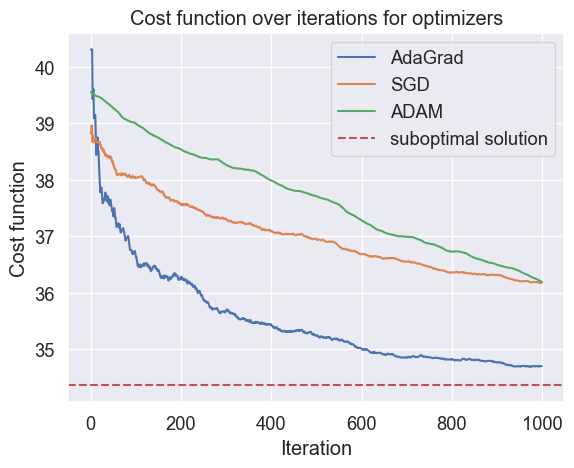

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid", font_scale=1.2)

plt.plot(results, label="AdaGrad")
plt.plot(results_sgd, label="SGD")
plt.plot(adam_results, label="ADAM")
plt.xlabel("Iteration")
plt.ylabel("Cost function")
plt.axhline(y=baseline, color='r', linestyle='--', label="suboptimal solution")
plt.legend()
plt.title("Cost function over iterations for optimizers")
plt.show()